In [9]:
print(__doc__)

# Code source adapted from: Jaques Grobler
# License: BSD 3 clause

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import os
import csv
import pprint
import time
import itertools
import NeuralNetworkModel as NNM
import LogisticRegressionModel as LRM
import SoftmaxRegressionModel as SRM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pp = pprint.PrettyPrinter(indent=4)

Automatically created module for IPython interactive environment


In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [2]:
# Read and treat training dataset
dataset_train = pandas.read_csv('fashion-mnist-dataset/fashion-mnist_train.csv').values #np.genfromtxt('fashion-mnist-dataset/fashion-mnist_train.csv', delimiter=',')
y_true = dataset_train[:,0]
dataset_train = np.delete(dataset_train, 0, 1).T
dataset_train = dataset_train / dataset_train.max()

# Read and treat test dataset
dataset_test = pandas.read_csv('fashion-mnist-dataset/fashion-mnist_test.csv').values
target_test = dataset_test[:,0]
dataset_test = np.delete(dataset_test, 0, 1).T
dataset_test = dataset_test / dataset_test.max()

# Separate train dataset in Train and Validation Data
half = len(y_true)//2

data_train = dataset_train[:,:half]
target_train = y_true[:half]
data_val = dataset_train[:,half:]
target_val = y_true[half:]

In [3]:
#######################################
#######                         #######
#######     Neural Network      #######
#######                         #######  
#######################################

neural_model_sigmoid_1 = NNM.Model(data_train, target_train, activation="sigmoid", epochs=1, alpha=0.01, l_hidden=1, hidden_neurons=512, batch_size=1, use_softmax=True)
for i in range(10):
    neural_model_sigmoid_1.fit()

    neural_y_pred = neural_model_sigmoid_1.Predict(data_val, target_val)
    print(confusion_matrix(target_val, neural_y_pred))
    print(classification_report(target_val, neural_y_pred))
    
    neural_model_sigmoid_1.alpha /= 1.2

Epochs: 1 / 1:   0%|          | 0/30000 [00:00<?, ?it/s]/home/matheusmortatti/git/Machine-Learning-Class/Assignment02/NeuralNetworkModel.py:185: ComplexWarning: Casting complex values to real discards the imaginary part
  self.D[k][i,:] = (a*err[i])[:,0]
/home/matheusmortatti/git/Machine-Learning-Class/Assignment02/NeuralNetworkModel.py:186: ComplexWarning: Casting complex values to real discards the imaginary part
  self.bD[k][i] = err[i]
Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:14:56<00:00,  6.78it/s]


[[2397   34  211  111   41    1  115    1   52    0]
 [  10 2885   38   35   22    1    5    1    1    0]
 [  22    6 2367   20  519    2   52    0   20    0]
 [ 163  134   76 2307  262    1   26    0   18    0]
 [   5    9  313   52 2663    1   49    0    8    0]
 [   3    3    6    1    1 2719    2  191   40   52]
 [ 540   25  608   73  698    1  956    2   59    0]
 [   0    0    0    0    0   99    0 2781   18   46]
 [   7    5  129   19   29   17   16   19 2765    1]
 [   3    3    4    2    0   76    0  298    6 2621]]
             precision    recall  f1-score   support

          0       0.76      0.81      0.78      2963
          1       0.93      0.96      0.95      2998
          2       0.63      0.79      0.70      3008
          3       0.88      0.77      0.82      2987
          4       0.63      0.86      0.73      3100
          5       0.93      0.90      0.92      3018
          6       0.78      0.32      0.46      2962
          7       0.84      0.94      0.89  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:15:00<00:00,  6.69it/s]


[[2301    7   18  186   20    1  407    0   23    0]
 [  11 2860   18   78    8    0   22    1    0    0]
 [  55    1 1849   46  488    1  557    0   11    0]
 [  83   33   11 2650  116    0   81    0   13    0]
 [   5    2  156  115 2535    0  280    0    7    0]
 [   5    2    2    2    0 2616    8  229   44  110]
 [ 391   10  155  112  300    0 1968    0   25    1]
 [   0    0    0    0    0   48    0 2769   18  109]
 [  22    1   23   28   21    7  167   18 2719    1]
 [   4    0    1    1    1   23    0  120    5 2858]]
             precision    recall  f1-score   support

          0       0.80      0.78      0.79      2963
          1       0.98      0.95      0.97      2998
          2       0.83      0.61      0.71      3008
          3       0.82      0.89      0.85      2987
          4       0.73      0.82      0.77      3100
          5       0.97      0.87      0.92      3018
          6       0.56      0.66      0.61      2962
          7       0.88      0.94      0.91  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:14:59<00:00,  6.51it/s]


[[2413    2    9   70   11    1  416    1   40    0]
 [  26 2856   14   71    6    1   20    1    2    1]
 [ 109    2 1982   22  352    2  499    0   40    0]
 [ 192   22    7 2426  170    1  148    0   21    0]
 [  20    3  211   60 2322    0  461    0   23    0]
 [   5    1    0    0    0 2664    6  185   49  108]
 [ 429    8  153   46  176    1 2088    0   60    1]
 [   0    0    0    0    0   75    0 2740   16  113]
 [  22    1    5   13    7    7   73   19 2859    1]
 [   3    0    1    0    0   17    0  131    8 2853]]
             precision    recall  f1-score   support

          0       0.75      0.81      0.78      2963
          1       0.99      0.95      0.97      2998
          2       0.83      0.66      0.74      3008
          3       0.90      0.81      0.85      2987
          4       0.76      0.75      0.76      3100
          5       0.96      0.88      0.92      3018
          6       0.56      0.70      0.63      2962
          7       0.89      0.93      0.91  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:14:57<00:00,  6.86it/s]


[[2581    4    7  126   21    1  197    1   25    0]
 [  22 2867    5   81    8    1   11    1    1    1]
 [  99    2 1630   75  714    4  470    0   14    0]
 [ 150   22    3 2654   97    2   49    0   10    0]
 [  14    5   81  152 2638    0  203    0    7    0]
 [   4    1    0    0    0 2813    5  114   11   70]
 [ 617    9   99  111  362    1 1728    0   34    1]
 [   0    0    0    0    0  129    0 2710    6   99]
 [  34    4    4   28   30   29   96   20 2761    1]
 [   3    0    1    0    0   35    0  117    1 2856]]
             precision    recall  f1-score   support

          0       0.73      0.87      0.80      2963
          1       0.98      0.96      0.97      2998
          2       0.89      0.54      0.67      3008
          3       0.82      0.89      0.85      2987
          4       0.68      0.85      0.76      3100
          5       0.93      0.93      0.93      3018
          6       0.63      0.58      0.60      2962
          7       0.91      0.92      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:14:02<00:00,  6.77it/s]


[[2486   18  150  112   14    2  145    1   35    0]
 [  11 2892   30   47    7    1    6    1    2    1]
 [  36    3 2752   18  128    2   56    0   13    0]
 [ 110   52   99 2531  141    2   37    0   15    0]
 [   7    7  791   79 2118    0   90    0    8    0]
 [   4    1    5    0    0 2767    2  156   19   64]
 [ 552   13  743   78  248    1 1289    1   36    1]
 [   0    0    0    0    0   81    0 2793    8   62]
 [  18    6   86   17   13   13   22   23 2808    1]
 [   2    0    1    0    0   37    0  166    4 2803]]
             precision    recall  f1-score   support

          0       0.77      0.84      0.80      2963
          1       0.97      0.96      0.97      2998
          2       0.59      0.91      0.72      3008
          3       0.88      0.85      0.86      2987
          4       0.79      0.68      0.73      3100
          5       0.95      0.92      0.93      3018
          6       0.78      0.44      0.56      2962
          7       0.89      0.95      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:14:12<00:00,  6.84it/s]


[[2432    6   16  133    4    1  329    1   41    0]
 [  15 2892    5   70    2    1   10    1    1    1]
 [  96    2 2141   68  277    2  393    0   29    0]
 [ 102   36    3 2693   49    2   85    0   17    0]
 [  18   11  257  231 2152    0  410    0   21    0]
 [   4    2    0    0    0 2761    5  159   27   60]
 [ 468   10  198   99  137    1 1997    0   51    1]
 [   0    0    0    0    0   63    0 2774   11   96]
 [  20    5   10   25    4   10   54   19 2859    1]
 [   2    0    1    1    0   34    0  123    4 2848]]
             precision    recall  f1-score   support

          0       0.77      0.82      0.79      2963
          1       0.98      0.96      0.97      2998
          2       0.81      0.71      0.76      3008
          3       0.81      0.90      0.85      2987
          4       0.82      0.69      0.75      3100
          5       0.96      0.91      0.94      3018
          6       0.61      0.67      0.64      2962
          7       0.90      0.94      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:14:10<00:00,  6.90it/s]


[[2111    7   30   97    4    3  676    0   35    0]
 [   8 2881   16   62    4    1   22    1    2    1]
 [  32    1 2274   36  149    3  500    0   13    0]
 [  91   37   17 2603   83    2  139    0   15    0]
 [   4    7  375  129 1969    0  605    0   11    0]
 [   3    1    1    0    0 2889    6   68   16   34]
 [ 235    7  197   66   88    1 2336    0   31    1]
 [   0    0    0    0    0  202    0 2674   12   56]
 [  13    4   18   16    5   25  111   12 2802    1]
 [   3    0    1    1    0   70    0  159    6 2773]]
             precision    recall  f1-score   support

          0       0.84      0.71      0.77      2963
          1       0.98      0.96      0.97      2998
          2       0.78      0.76      0.77      3008
          3       0.86      0.87      0.87      2987
          4       0.86      0.64      0.73      3100
          5       0.90      0.96      0.93      3018
          6       0.53      0.79      0.64      2962
          7       0.92      0.91      0.91  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:13:52<00:00,  6.84it/s]


[[2524   12   42   92    8    2  241    1   41    0]
 [  16 2900   13   52    6    1    6    1    2    1]
 [  71    2 2432   40  219    2  219    0   23    0]
 [ 170   43   14 2581   95    2   65    0   17    0]
 [  11    9  377  141 2279    0  268    0   15    0]
 [   4    2    2    0    0 2799    4  138   20   49]
 [ 525   10  282   70  189    1 1842    1   41    1]
 [   0    0    0    0    0   88    0 2792    6   58]
 [  23    6   20   19    8   15   53   18 2844    1]
 [   5    0    1    0    0   39    0  180    3 2785]]
             precision    recall  f1-score   support

          0       0.75      0.85      0.80      2963
          1       0.97      0.97      0.97      2998
          2       0.76      0.81      0.79      3008
          3       0.86      0.86      0.86      2987
          4       0.81      0.74      0.77      3100
          5       0.95      0.93      0.94      3018
          6       0.68      0.62      0.65      2962
          7       0.89      0.95      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:13:54<00:00,  6.84it/s]


[[2718    6   26   48    8    2  117    1   37    0]
 [  27 2888   13   52    5    1    8    1    2    1]
 [ 128    1 2335   34  215    2  273    0   20    0]
 [ 276   40   12 2498   86    2   52    0   21    0]
 [  35    9  346  125 2276    0  289    0   20    0]
 [   5    2    2    0    0 2838    4  108   17   42]
 [ 801    8  231   54  168    1 1657    1   40    1]
 [   0    0    0    0    0  117    0 2754    6   67]
 [  41    4   12   14    8   20   46   19 2842    1]
 [   5    0    1    0    0   45    0  157    2 2803]]
             precision    recall  f1-score   support

          0       0.67      0.92      0.78      2963
          1       0.98      0.96      0.97      2998
          2       0.78      0.78      0.78      3008
          3       0.88      0.84      0.86      2987
          4       0.82      0.73      0.78      3100
          5       0.94      0.94      0.94      3018
          6       0.68      0.56      0.61      2962
          7       0.91      0.94      0.92  

Epochs: 1 / 1: 100%|██████████| 30000/30000 [1:14:15<00:00,  6.77it/s]


[[2453   14   46   81   11    2  319    1   36    0]
 [  11 2905   14   47    7    1    9    1    2    1]
 [  55    3 2371   35  297    2  233    0   12    0]
 [ 150   55   15 2534  128    2   86    0   17    0]
 [   6    6  291   95 2452    0  239    0   11    0]
 [   4    2    2    0    0 2758    4  157   17   74]
 [ 447    9  272   66  236    1 1895    1   34    1]
 [   0    0    0    0    0   68    0 2783    7   86]
 [  16    5   28   16   15   17   65   22 2822    1]
 [   2    0    1    0    0   30    0  130    2 2848]]
             precision    recall  f1-score   support

          0       0.78      0.83      0.80      2963
          1       0.97      0.97      0.97      2998
          2       0.78      0.79      0.78      3008
          3       0.88      0.85      0.86      2987
          4       0.78      0.79      0.79      3100
          5       0.96      0.91      0.94      3018
          6       0.66      0.64      0.65      2962
          7       0.90      0.95      0.92  

In [7]:
## Result with Sigmoid, 512 hidden neurons and 1 hidden layer VALIDATION
neural_y_pred_val = neural_model_sigmoid_1.Predict(data_val, target_val)
neural_conf_matrix_val = confusion_matrix(target_val, neural_y_pred_val)
neural_class_report_val = classification_report(target_val, neural_y_pred_val)
print(neural_conf_matrix_val)
print(neural_class_report_val)

[[2453   14   46   81   11    2  319    1   36    0]
 [  11 2905   14   47    7    1    9    1    2    1]
 [  55    3 2371   35  297    2  233    0   12    0]
 [ 150   55   15 2534  128    2   86    0   17    0]
 [   6    6  291   95 2452    0  239    0   11    0]
 [   4    2    2    0    0 2758    4  157   17   74]
 [ 447    9  272   66  236    1 1895    1   34    1]
 [   0    0    0    0    0   68    0 2783    7   86]
 [  16    5   28   16   15   17   65   22 2822    1]
 [   2    0    1    0    0   30    0  130    2 2848]]
             precision    recall  f1-score   support

          0       0.78      0.83      0.80      2963
          1       0.97      0.97      0.97      2998
          2       0.78      0.79      0.78      3008
          3       0.88      0.85      0.86      2987
          4       0.78      0.79      0.79      3100
          5       0.96      0.91      0.94      3018
          6       0.66      0.64      0.65      2962
          7       0.90      0.95      0.92  

Confusion matrix, without normalization
[[2453   14   46   81   11    2  319    1   36    0]
 [  11 2905   14   47    7    1    9    1    2    1]
 [  55    3 2371   35  297    2  233    0   12    0]
 [ 150   55   15 2534  128    2   86    0   17    0]
 [   6    6  291   95 2452    0  239    0   11    0]
 [   4    2    2    0    0 2758    4  157   17   74]
 [ 447    9  272   66  236    1 1895    1   34    1]
 [   0    0    0    0    0   68    0 2783    7   86]
 [  16    5   28   16   15   17   65   22 2822    1]
 [   2    0    1    0    0   30    0  130    2 2848]]


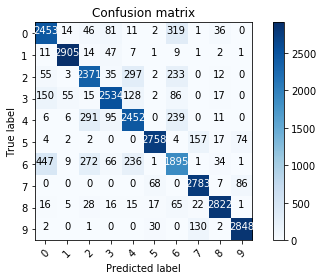

In [10]:
plt.figure()
plot_confusion_matrix(neural_conf_matrix_val, np.arange(10))
plt.savefig("cm_sigmoid_1h_val.png")
plt.show()

In [12]:
## Result with sigmoid, 512 hidden neurons and 1 hidden layer TEST
neural_y_pred = neural_model_sigmoid_1.Predict(dataset_test, target_test)
neural_conf_matrix = confusion_matrix(target_test, neural_y_pred)
neural_class_report = classification_report(target_test, neural_y_pred)
print(neural_conf_matrix)
print(neural_class_report)

[[831   5  19  25   2   1 105   1  11   0]
 [  6 972   3  15   0   1   3   0   0   0]
 [ 14   3 772  14 108   0  83   0   6   0]
 [ 42  27  13 865  30   1  21   0   1   0]
 [  3   3  80  26 825   0  61   0   2   0]
 [  1   3   1   1   0 910   0  59   5  20]
 [144   8  87  21  73   1 652   0  14   0]
 [  0   0   0   0   0  20   0 928   0  52]
 [  6   0  11   2   6   5  20   8 942   0]
 [  0   0   0   0   0   7   0  48   2 943]]
             precision    recall  f1-score   support

          0       0.79      0.83      0.81      1000
          1       0.95      0.97      0.96      1000
          2       0.78      0.77      0.78      1000
          3       0.89      0.86      0.88      1000
          4       0.79      0.82      0.81      1000
          5       0.96      0.91      0.94      1000
          6       0.69      0.65      0.67      1000
          7       0.89      0.93      0.91      1000
          8       0.96      0.94      0.95      1000
          9       0.93      0.94      

Confusion matrix, without normalization
[[831   5  19  25   2   1 105   1  11   0]
 [  6 972   3  15   0   1   3   0   0   0]
 [ 14   3 772  14 108   0  83   0   6   0]
 [ 42  27  13 865  30   1  21   0   1   0]
 [  3   3  80  26 825   0  61   0   2   0]
 [  1   3   1   1   0 910   0  59   5  20]
 [144   8  87  21  73   1 652   0  14   0]
 [  0   0   0   0   0  20   0 928   0  52]
 [  6   0  11   2   6   5  20   8 942   0]
 [  0   0   0   0   0   7   0  48   2 943]]


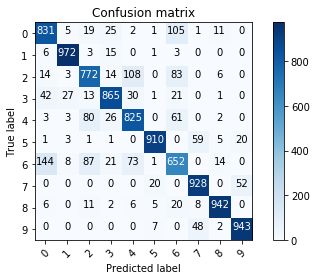

In [13]:
plt.figure()
plot_confusion_matrix(neural_conf_matrix, np.arange(10))
plt.savefig("cm_sigmoid_1h.png")
plt.show()